In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd 'drive/My Drive/Siamese/Identification'

/content/drive/My Drive/Siamese/Identification


In [3]:
import sys
sys.path.insert(0, '..')
sys.path.insert(0, '../Data')
sys.path.insert(0, '../Encoder')

In [4]:
!pip install torchaudio

In [5]:
import os
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

from tqdm import tqdm

In [6]:
DATASET_PATH = '/content/drive/My Drive/DataSet'
MODEL_PATH = '/content/drive/My Drive/Siamese/net.nn'
EPOCH_NUM = 1
SPEAKERS_NUM = 20

torch.backends.cudnn.deterministic = True

NUM_WORKERS = 4

In [7]:
from IdentificationDataset import IdentificationDataset
from IdentificationDataset import ReturnType

from torchvision.transforms import Compose
from Normalize import Normalize
from ToTensor import ToTensor

DATASET_PATH = '/content/drive/My Drive/DataSet'

transforms = Compose([
    Normalize(),
    ToTensor()
])

In [8]:
from Conference import Conference

# Define default device, we should use the GPU (cuda) if available
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)
net = Conference(DEVICE, time=False)
net.load_encoder(size=1)
net.to(DEVICE)

cuda
Encoder loaded


Conference(
  (encoder): TransFourier(
    (spectrogram): Spectrogram()
    (amp): AmplitudeToDB()
    (block1): Conv2DBlock(
      (conv1): Conv2d(1, 32, kernel_size=(1, 1), stride=(2, 1))
      (conv2): Conv2d(1, 96, kernel_size=(7, 7), stride=(2, 1), padding=(3, 3))
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (maxpool): MaxPool2d(kernel_size=(4, 4), stride=(4, 4), padding=0, dilation=1, ceil_mode=False)
    )
    (block2): Conv2DBlock(
      (conv1): Conv2d(128, 64, kernel_size=(1, 1), stride=(2, 1))
      (conv2): Conv2d(128, 192, kernel_size=(5, 5), stride=(2, 1), padding=(2, 2))
      (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (maxpool): MaxPool2d(kernel_size=(4, 2), stride=(4, 2), padding=0, dilation=1, ceil_mode=False)
    )
    (block3): Conv2DBlock(
      (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(2, 1))
      (conv2): Co

In [9]:
import numpy as np

conf_gold_label = None
conf_pred_label = None

with torch.no_grad():
  net.eval()
  final_mean_accuracies = []
  final_min_accuracies = []

  for cross_id in range(1, 10):
    if cross_id == 6 or cross_id == 7 or cross_id == 9:
      continue
    print("*** Cross id ", cross_id, " ***")
    testset = IdentificationDataset(DATASET_PATH, 
                                SPEAKERS_NUM,
                                train=False, 
                                transform=transforms,
                                lenght=3,
                                return_type=ReturnType.STANDARD,
                                cross_id=cross_id)
    testsetloader = torch.utils.data.DataLoader(testset, 
                                            batch_size=1, 
                                            num_workers=NUM_WORKERS)
    # Get new speaker list
    net.load(20, size=1, cross_id=cross_id)
    net.initplaces(maxsize=3)
    max_mean_accuracy = 0
    max_topk_accuracy = 0
    max_min_accuracy = 0

    for epoch_num in range(EPOCH_NUM):
      print("*** Epoch ", epoch_num, " ***")
      final_mean_accuracy = 0
      final_min_accuracy = 0
      nb_test = 0

      for iter_num, (gold_label, sample) in tqdm(enumerate(testsetloader)):
        gold_label = gold_label.item()
        # Speaker identification network need to have the sample and the place
        final_mean_label, final_min_label = net(sample, place_id=gold_label)
        nb_test += 1

        if gold_label == final_mean_label:
          final_mean_accuracy += 1
        if gold_label == final_min_label:
          final_min_accuracy += 1

      final_mean_accuracy /= nb_test
      final_min_accuracy /= nb_test
      final_mean_accuracies.append(final_mean_accuracy)
      final_min_accuracies.append(final_min_accuracy)
      print("accuracy final_mean ", final_mean_accuracy, 
            " final_min ", final_min_accuracy)


*** Cross id  1  ***
sample lenght  3 seconds
Load  /content/drive/My Drive/Siamese/Identification/Saved/speakers_20_1_1.pt
*** Epoch  0  ***


2634it [00:33, 78.27it/s]

accuracy final_mean  0.9779802581624905  final_min  0.9350797266514806
*** Cross id  2  ***
sample lenght  3 seconds
Load  /content/drive/My Drive/Siamese/Identification/Saved/speakers_20_1_2.pt
*** Epoch  0  ***



2325it [00:29, 77.84it/s]


accuracy final_mean  0.9703225806451613  final_min  0.9324731182795699
*** Cross id  3  ***
sample lenght  3 seconds
Load  /content/drive/My Drive/Siamese/Identification/Saved/speakers_20_1_3.pt
*** Epoch  0  ***


2690it [00:34, 77.69it/s]

accuracy final_mean  0.962453531598513  final_min  0.9263940520446097
*** Cross id  4  ***
sample lenght  3 seconds
Load  /content/drive/My Drive/Siamese/Identification/Saved/speakers_20_1_4.pt
*** Epoch  0  ***



1928it [00:24, 77.97it/s]


accuracy final_mean  0.9486514522821576  final_min  0.8988589211618258
*** Cross id  5  ***
sample lenght  3 seconds
Load  /content/drive/My Drive/Siamese/Identification/Saved/speakers_20_1_5.pt
*** Epoch  0  ***


2517it [00:32, 77.39it/s]


accuracy final_mean  0.9686134286849424  final_min  0.9459674215335717
*** Cross id  8  ***
sample lenght  3 seconds
Load  /content/drive/My Drive/Siamese/Identification/Saved/speakers_20_1_8.pt
*** Epoch  0  ***


3436it [04:13, 13.56it/s]

accuracy final_mean  0.939755529685681  final_min  0.9123981373690337


In [12]:
print("Min ",  final_min_accuracies)
print("Mean ", final_mean_accuracies)

Min  [0.9350797266514806, 0.9324731182795699, 0.9263940520446097, 0.8988589211618258, 0.9459674215335717, 0.9123981373690337]
Mean  [0.9779802581624905, 0.9703225806451613, 0.962453531598513, 0.9486514522821576, 0.9686134286849424, 0.939755529685681]


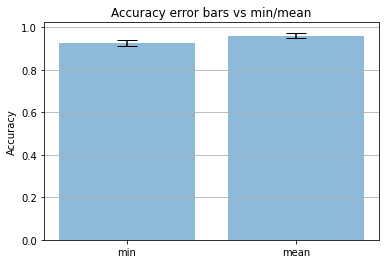

In [14]:
import numpy as np
import matplotlib.pyplot as plt

mean1 = np.mean(final_min_accuracies)
std1 = np.std(final_min_accuracies)
mean2 = np.mean(final_mean_accuracies)
std2 = np.std(final_mean_accuracies)

mean = [mean1, mean2]
std = [std1, std2]
labels = ['min', 'mean']
x_pos = np.arange(len(labels))

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, 
       mean,
       yerr=std,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Accuracy error bars vs min/mean')
ax.yaxis.grid(True)
